In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler   
from sklearn.preprocessing import LabelEncoder




In [27]:
df=pd.read_csv("marketing_campaign_eng.csv")
df.drop(columns=["ID"],inplace=True)
df.dropna(inplace=True)
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Num_Kids,Tot_Cmp_Accepted,Itm_Total
0,Graduation,58138.0,0,0,58,635,88,546,172,88,...,4,7,0,1,65,3873.586824,1,0,0,2252
1,Graduation,46344.0,1,1,38,11,1,6,2,1,...,2,5,0,0,68,3027.586824,1,2,0,38
2,Graduation,71613.0,0,0,26,426,49,127,111,21,...,10,4,0,0,57,3374.586824,2,0,0,1202
3,Graduation,26646.0,1,0,26,11,4,20,10,3,...,4,6,0,0,38,2967.586824,2,1,0,64
4,PhD,58293.0,1,0,94,173,43,118,46,27,...,6,5,0,0,41,3223.586824,2,1,0,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,61223.0,0,1,46,709,43,182,42,118,...,4,5,0,0,55,3443.586824,2,1,0,2050
2236,PhD,64014.0,2,1,56,406,0,30,0,0,...,5,7,0,0,76,2963.586824,2,3,1,850
2237,Graduation,56981.0,0,0,91,908,48,217,32,12,...,13,6,0,0,41,3217.586824,1,0,1,2149
2238,Master,69245.0,0,1,8,428,30,214,80,30,...,10,3,0,0,66,3218.586824,2,1,0,1271


In [28]:
labels=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=labels.fit_transform(df[i])
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Num_Kids,Tot_Cmp_Accepted,Itm_Total
0,2,58138.0,0,0,58,635,88,546,172,88,...,4,7,0,1,65,3873.586824,1,0,0,2252
1,2,46344.0,1,1,38,11,1,6,2,1,...,2,5,0,0,68,3027.586824,1,2,0,38
2,2,71613.0,0,0,26,426,49,127,111,21,...,10,4,0,0,57,3374.586824,2,0,0,1202
3,2,26646.0,1,0,26,11,4,20,10,3,...,4,6,0,0,38,2967.586824,2,1,0,64
4,4,58293.0,1,0,94,173,43,118,46,27,...,6,5,0,0,41,3223.586824,2,1,0,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,0,1,46,709,43,182,42,118,...,4,5,0,0,55,3443.586824,2,1,0,2050
2236,4,64014.0,2,1,56,406,0,30,0,0,...,5,7,0,0,76,2963.586824,2,3,1,850
2237,2,56981.0,0,0,91,908,48,217,32,12,...,13,6,0,0,41,3217.586824,1,0,1,2149
2238,3,69245.0,0,1,8,428,30,214,80,30,...,10,3,0,0,66,3218.586824,2,1,0,1271


In [29]:
X=df.values

In [30]:
model=GaussianMixture(n_components=3,random_state=42)
label=model.fit_predict(X)  
label

array([1, 0, 1, ..., 1, 1, 0], shape=(2240,))

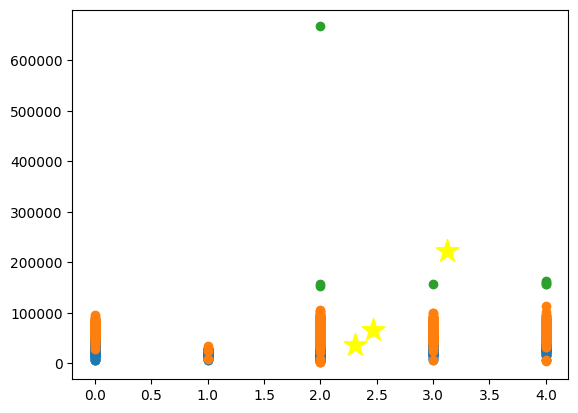

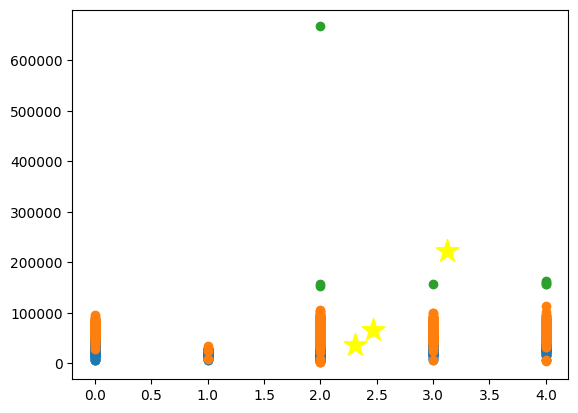

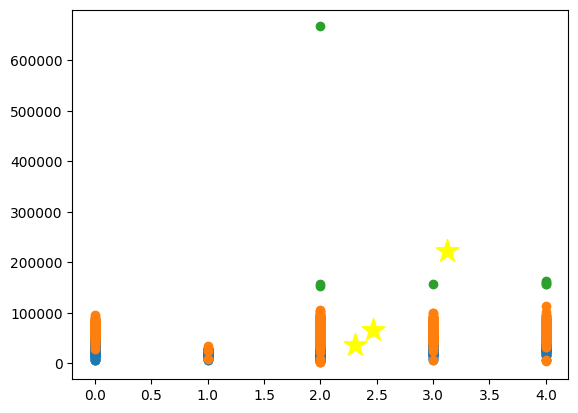

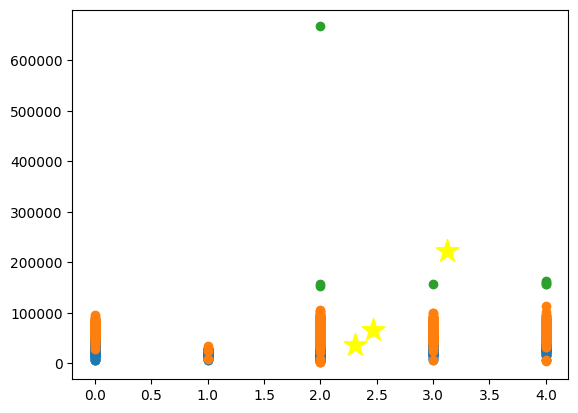

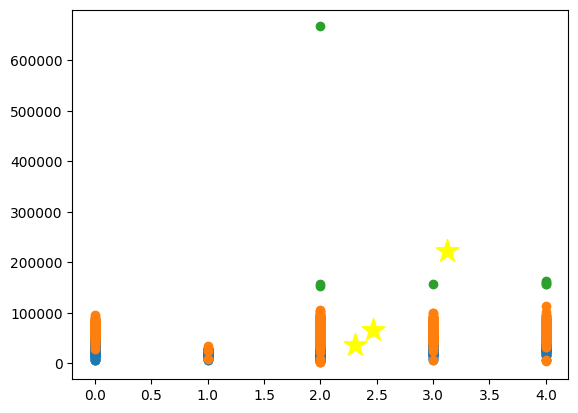

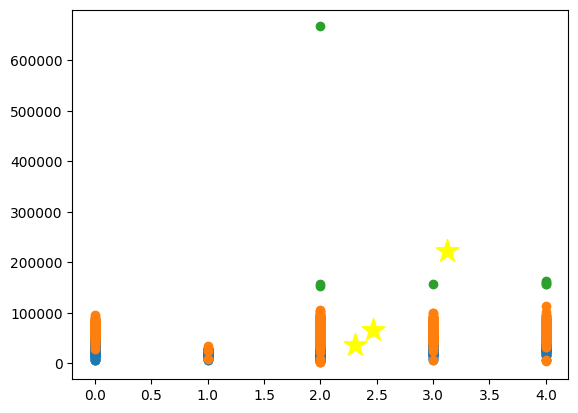

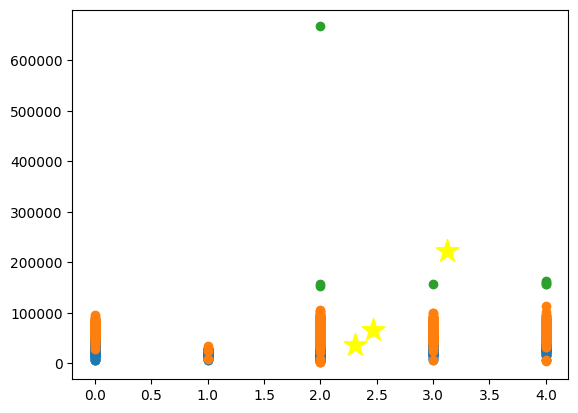

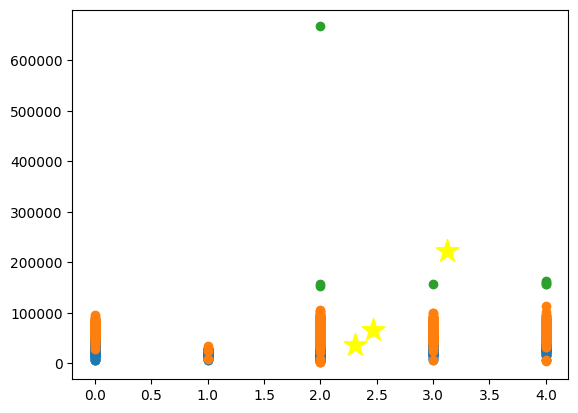

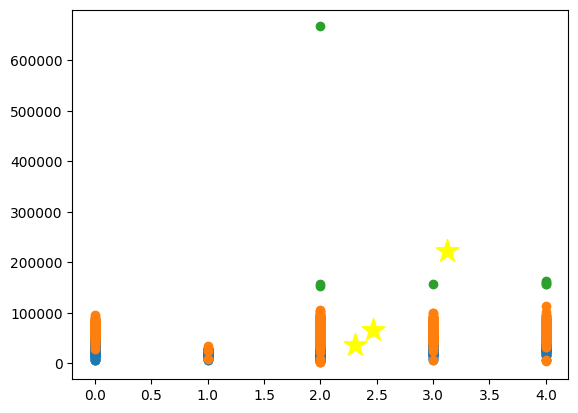

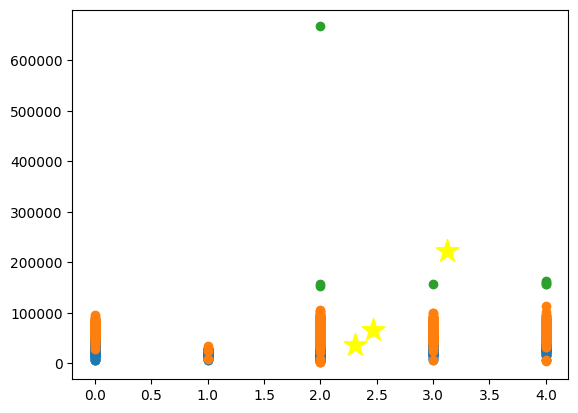

In [31]:

for i in range(10):
    label=model.fit_predict(X)
    for j in range(3):
        plt.scatter(X[label==j, 0],X[label==j, 1])
    plt.scatter(model.means_[:,0],model.means_[:,1],s=300,c='yellow',marker='*')
    plt.pause(0.5)
   
    plt.show()